In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump, load

# Load

In [2]:
# load dataset
dataset = pd.read_csv('../data/pima-indians-diabetes.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


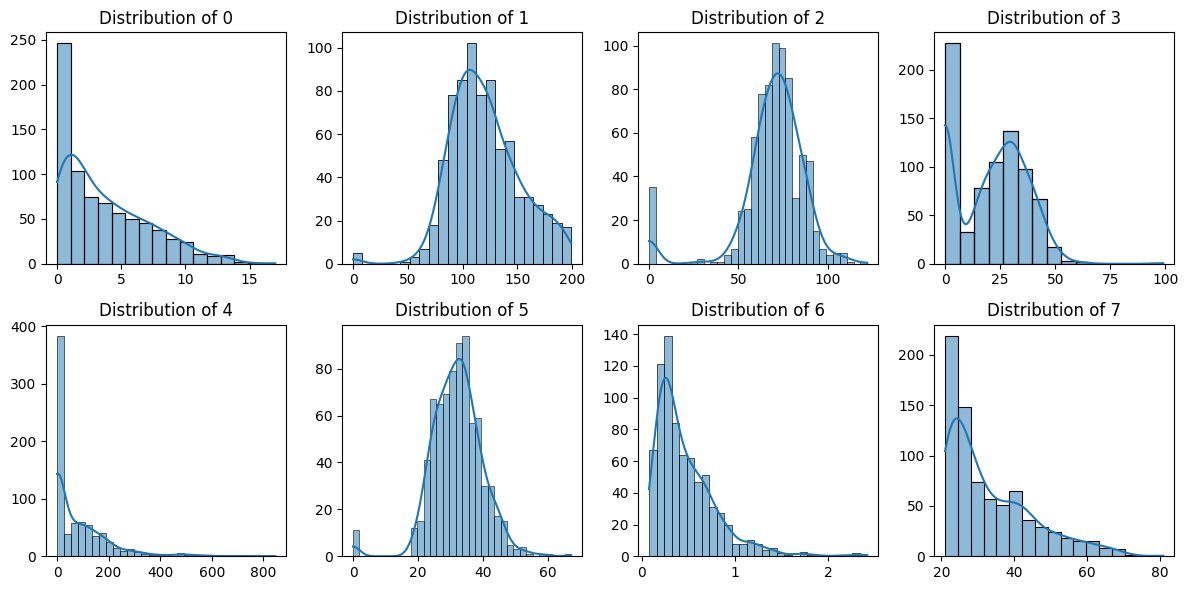

In [3]:
# Setting up the figure and axes for a 2x4 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flattening the 2D array of axes for iteration
axes_flat = axes.flatten()

# Plotting histograms for the first 8 columns
for col, ax in zip(dataset.columns[:8], axes_flat):
    sns.histplot(dataset[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Scale

In [4]:
# # MinMaxScaler for col 0, 3, 4 
# minmax_scaler = MinMaxScaler()
# data_rescaled = minmax_scaler.fit_transform(dataset.iloc[:, [0, 3, 4]])
# dataset.iloc[:, [0, 3, 4]] = data_rescaled

# # RobustScaler for col 1, 2, 5, 7
# robust_scaler = RobustScaler(quantile_range=(30, 70))
# data_rescaled = robust_scaler.fit_transform(dataset.iloc[:, [1, 2, 5, 7]])
# dataset.iloc[:, [1, 2, 5, 7]] = data_rescaled

# # PowerTransformer for col 6
# power_scaler = PowerTransformer(method='yeo-johnson')
# data_rescaled = power_scaler.fit_transform(dataset.iloc[:, [6]])
# dataset.iloc[:, [6]] = data_rescaled

In [5]:
# Power Transformer for all columns
scaler = PowerTransformer(method='yeo-johnson')
data_rescaled = scaler.fit_transform(dataset)
dataset = pd.DataFrame(data_rescaled, columns=dataset.columns)

# RobustScaler for all columns
scaler = RobustScaler(quantile_range=(30, 70))
data_rescaled = scaler.fit_transform(dataset)
dataset = pd.DataFrame(data_rescaled, columns=dataset.columns)

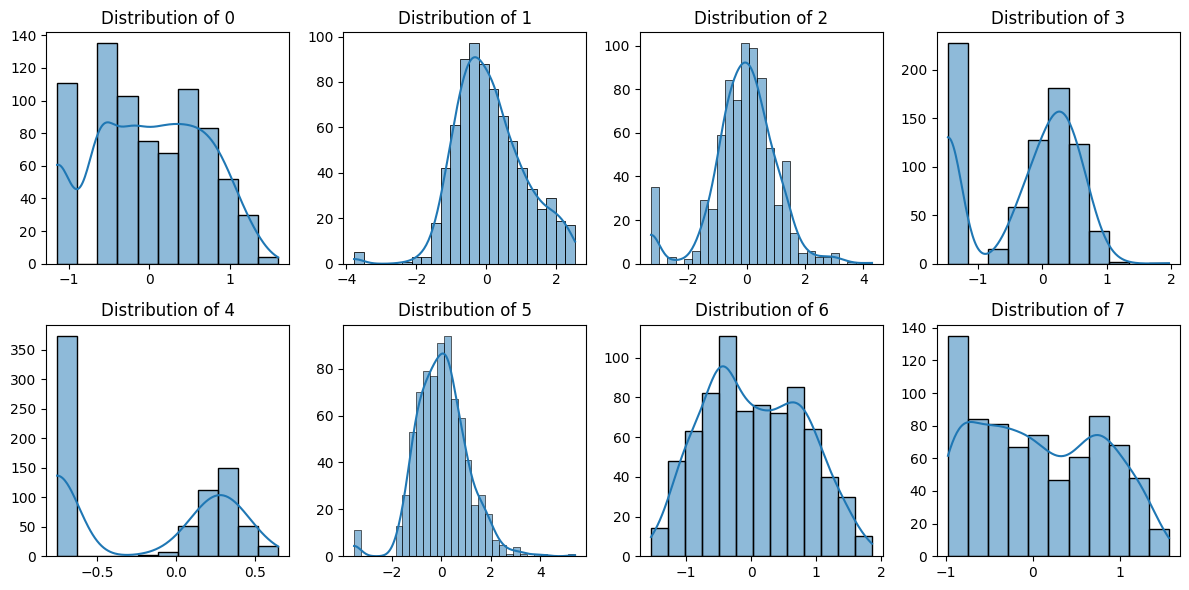

In [6]:
# Setting up the figure and axes for a 2x4 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flattening the 2D array of axes for iteration
axes_flat = axes.flatten()

# Plotting histograms for the first 8 columns
for col, ax in zip(dataset.columns[:8], axes_flat):
    sns.histplot(dataset[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Evaluate

In [7]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

# explore the scaling range of the robust scaler transform
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
model = KNeighborsClassifier()
# evaluate the model
scores = evaluate_model(model, X, y)

In [8]:
mean(scores)

0.7617053998632947

# Dump pkl file

In [9]:
scalers_dict = {
    "MinMaxScaler": MinMaxScaler().fit(dataset.iloc[:, [0, 3, 4]]),
    "RobustScaler": RobustScaler(quantile_range=(30, 70)).fit(dataset.iloc[:, [1, 2, 5, 7]]),
    "PowerTransformer": PowerTransformer(method='yeo-johnson').fit(dataset.iloc[:, [6]]),}

file_path = "../hw/NguyenVuAnhNgoc_11214369_scaler.pkl"
dump(scalers_dict, open(file_path, 'wb'))

In [10]:
scaler = load(open(file_path, 'rb'))
scaler

{'MinMaxScaler': MinMaxScaler(),
 'RobustScaler': RobustScaler(quantile_range=(30, 70)),
 'PowerTransformer': PowerTransformer()}